## Relax Inc. Take-Home Challenge

### Summary of results

Factors that help predict whether a user adopts the product include how their account was created, number of users in the organization, and email domain (gmail, yahoo, etc.) 

Overall, about 13% of users adopted the product. (Note that I counted users who never logged in as failing to adopt, rather than dropping them.) People who were invited to join another user's personal workspace had only an 8% change of adopting the product, significantly less than for any other groups. There were also slight differences between other categories, but these were not all statistically significant. The main takeaway is that people invited to join another's personal workspace are unlikely to adopt the product.

To my surprise, there was no difference in adoption between those who did and did not receive marketing emails, or between those who were or were not on the regular marketing email drip. This suggests that emails are not effective in encouraging customers to use the product.

I created two new features, in hopes of finding more predictors. First, I looked at size of the organization. I found that most organizations have 50 or fewer users; however, about a quarter of users are in organizations with more than 50. Organizations with more than 50 users tend to have a lower rate of adoptions (15% vs 9%). It is possible that the product works best for smaller teams, and that some large organizations are indiscriminately inviting people to join who will not find the product useful.

Finally, I looked at email domain. I grouped together all domains with fewer than 50 unique emails as `other`, leaving me with six major domains. There is a statistically significant association between email domain and adoption. Users with emails from yahoo.com are least likely to adopt the product, at only 10%. This is perhaps due to them being less tech savy consumers. The highest adoption rate was for hotmail, at 16%. While not all differences between cate

Given more time, I would be interested in exploring whether creation time had an impact on adoption. It may be useful to look at a subset of users who created their accounts at least a few months before the end of the timeframe captured by the `engagement_data` tables.
In terms of further research, I would be very interested to collect geographic and demographic data from a sample of users, and see if any of those features influenced adoption rates.

### Code

#### Creating an indicator variable for adopted users.

In [1]:
# import needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# load and inspect engagement data
engagement_data = pd.read_csv('takehome_user_engagement.csv')
engagement_data.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
engagement_data.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [4]:
# Convert time stamp to datetime datatype
engagement_data['time_stamp'] = pd.to_datetime(engagement_data['time_stamp'])

In [5]:
engagement_data.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [6]:
# Make sure data frame has an index of datetimes, so we can
# compute a rolling sum.
engagement_data = engagement_data.set_index('time_stamp')
engagement_data = engagement_data.sort_values('time_stamp')

In [7]:
# Get rolling sum of visits by each user ID over week-long window.
# If this rolling sum if 3 at any point, the user is adopted.
by_week = engagement_data.groupby('user_id').rolling(window = '7D').sum()

In [8]:
# Create data frame recording whether each user adopted the product
best_week = by_week.groupby('user_id').max()
adopted = pd.DataFrame(best_week > 2).reset_index()
adopted = adopted.rename(columns={'user_id':'object_id', 'visited':'adopted'})
adopted = adopted.set_index('object_id')
adopted.head()

,adopted
object_id,
1,False
2,True
3,False
4,False
5,False


In [9]:
# Load and inspect user data
df = pd.read_csv('takehome_users.csv', encoding='Latin-1')

In [10]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [11]:
df = df.set_index('object_id')
df.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [12]:
# Add adoption data to user data frame
df_full = df.join(adopted, how='left').reset_index()
df_full.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [13]:
# Look for missing values
df_full.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted                       3177
dtype: int64

In [14]:
# Notice that the number of missing values in adopted
# is exactly the number of missing values in the column
# last_session_creation_time. 
# Conclude that these users never created as session,
# so mark them as not adopted.
df_full['adopted'] = df_full['adopted'].fillna(False)
df_full.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted                          0
dtype: int64

In [15]:
df_full['creation_time'] = pd.to_datetime(df_full['creation_time'])
df_full.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [16]:
df_full.adopted.mean()

0.1335

It looks like about 13% of users adopted the product overall.

#### Differences by creation source

In [17]:
## Find total users invited from each source,
## number adopted from each source,
## proportion invited from each source.

by_source = df_full.groupby('creation_source').adopted.agg(['count',
                                                            'sum',
                                                             'mean'])
by_source = by_source.rename(columns = {'count': 'total', 
                            'sum':'adopted', 
                             'mean':'proportion'})
by_source = by_source.sort_values('proportion')
by_source

,total,adopted,proportion
creation_source,,,
PERSONAL_PROJECTS,2111,164,0.077688
ORG_INVITE,4254,553,0.129995
SIGNUP,2087,293,0.140393
GUEST_INVITE,2163,360,0.166436
SIGNUP_GOOGLE_AUTH,1385,232,0.167509


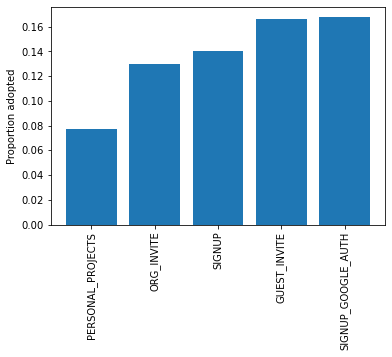

In [18]:
## Visualize proportion adopted by source.

plt.bar(x=by_source.index, height = by_source.proportion)
plt.xticks(rotation=90)
plt.ylabel('Proportion adopted')
plt.show()

In [19]:
## Check for statistical significance in differences
## of proportions.
from statsmodels.stats.proportion import proportions_chisquare_allpairs
print(proportions_chisquare_allpairs(count = by_source['adopted'], 
                               nobs = by_source['total']))

Corrected p-values using Holm-Sidak p-value correction

Pairs  p-values
(0, 1)  3.608e-09
(0, 2)  5.554e-10
(0, 3)  9.211e-18
(0, 4)  2.236e-15
(1, 2)  0.4413
(1, 3)  0.0004688
(1, 4)  0.002299
(2, 3)  0.07231
(2, 4)  0.08441
(3, 4)  0.9333


#### Differences based on opted_in_to_mailing_list and enabled_for_marketing_drip

In [20]:
df_full.groupby('opted_in_to_mailing_list').adopted.mean()

opted_in_to_mailing_list
0    0.131912
1    0.138277
Name: adopted, dtype: float64

In [21]:
df_full.groupby('enabled_for_marketing_drip').adopted.mean()

enabled_for_marketing_drip
0    0.132837
1    0.137277
Name: adopted, dtype: float64

To my surprise, there is no meaningful difference in adopted rates by either of these variables!

#### Differences by organization size

Does organization size influence whether a user adopts the product? 

In [22]:
# Find size and adoption rate for each organization.
orgs = df_full.groupby('org_id').adopted.agg(['count', 'sum', 'mean'])
orgs = orgs.rename(columns = {'count': 'org_size', 'sum': 'adopted', 'mean': 'proportion'})
orgs.sort_values('org_size', ascending=False)

,org_size,adopted,proportion
org_id,,,
0,319,11,0.034483
1,233,14,0.060086
2,201,15,0.074627
3,168,14,0.083333
4,159,16,0.100629
...,...,...,...
355,9,0,0.000000
400,8,3,0.375000
397,8,1,0.125000


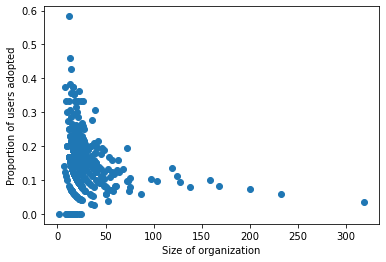

In [23]:
# Plot size versus adoption rate.
plt.scatter(x = orgs['org_size'], y = orgs['proportion'])
plt.xlabel('Users in organization')
plt.ylabel("Proportion of users adopted")
plt.show()

It appears that most organizations are small--under 50 users. There is more variability in adoption rates for small organization, but notice that every organization with over 20% adoption has 50 users or fewer.

In [24]:
## Create a data frame to record whether an organization
## has fewer than 50 employees.
small = pd.DataFrame(orgs['org_size'] <= 50)
small = small.rename(columns={'org_size': 'small'})
tester = df_full[['object_id', 'org_id', 'adopted']]
by_size = tester.join(small, how='inner', on='org_id')
by_size.head()

,object_id,org_id,adopted,small
0,1,11,False,False
150,151,11,False,False
178,179,11,False,False
253,254,11,False,False
465,466,11,False,False


In [25]:
## Compare rates of adoption for users who are part of 
## small (50 users or less) versus large organizations.
print(by_size.groupby('small')['adopted'].mean())
print(by_size.groupby('small')['adopted'].sum())
print(by_size.groupby('small')['adopted'].count())

small
False    0.092000
True     0.148914
Name: adopted, dtype: float64
small
False     299
True     1303
Name: adopted, dtype: int64
small
False    3250
True     8750
Name: adopted, dtype: int64


In [26]:
## Users from small organizations are much more likely to 
## adopt the product. Check this for statistical significance.
from statsmodels.stats.proportion import proportions_ztest
z_test, p_val = proportions_ztest(count = [299, 1303], 
                                  nobs=[3250, 8750])
print('p-value for difference of proportions: ', round(p_val, 3))

p-value for difference of proportions:  0.0


#### Differences by email domain

In [27]:
df_full['email']

0          AugustCClausen@yahoo.com
1            MatthewPoole@gustr.com
2        MitchellBottrill@gustr.com
3         NicklasSClausen@yahoo.com
4                GraceRaw@yahoo.com
                    ...            
11995         SophiaMeier@gustr.com
11996        AmelieFisher@gmail.com
11997           JakeHaynes@cuvox.de
11998            mhaerzxp@iuxiw.com
11999     ThaisMeloLima@hotmail.com
Name: email, Length: 12000, dtype: object

In [28]:
test_email = df_full[['object_id', 'email', 'adopted']]
email_splits = df_full.email.str.split('@', expand=True)
domains = email_splits[1]
test_email = pd.concat([test_email, domains], axis=1)
test_email = test_email.rename(columns={1:'domain'})
test_email.head()

,object_id,email,adopted,domain
0,1,AugustCClausen@yahoo.com,False,yahoo.com
1,2,MatthewPoole@gustr.com,True,gustr.com
2,3,MitchellBottrill@gustr.com,False,gustr.com
3,4,NicklasSClausen@yahoo.com,False,yahoo.com
4,5,GraceRaw@yahoo.com,False,yahoo.com


In [29]:
by_domain = test_email.groupby('domain').adopted.agg(['count', 'mean'])

In [30]:
by_domain = by_domain.reset_index()
by_domain = by_domain.rename(columns={'count': 'total',
                                      'mean': 'proportion'})

In [31]:
by_domain.sort_values('total', ascending=False)

,domain,total,proportion
293,gmail.com,3562,0.152442
1112,yahoo.com,2447,0.106661
440,jourrapide.com,1259,0.129468
130,cuvox.de,1202,0.114809
306,gustr.com,1179,0.121289
...,...,...,...
396,inrxl.com,1,0.000000
395,inrts.com,1,0.000000
394,inpmp.com,1,0.000000
393,innbs.com,1,0.000000


In [32]:
big_domains = list(by_domain.loc[by_domain['total'] > 50, 'domain'])

In [33]:
# Create data frame that records domain for each user's email,
# binning together all of the rare domains as 'other'.
test_email.loc[~test_email['domain'].isin(big_domains), 'domain'] = 'other'
test_email

,object_id,email,adopted,domain
0,1,AugustCClausen@yahoo.com,False,yahoo.com
1,2,MatthewPoole@gustr.com,True,gustr.com
2,3,MitchellBottrill@gustr.com,False,gustr.com
3,4,NicklasSClausen@yahoo.com,False,yahoo.com
4,5,GraceRaw@yahoo.com,False,yahoo.com
...,...,...,...,...
11995,11996,SophiaMeier@gustr.com,False,gustr.com
11996,11997,AmelieFisher@gmail.com,False,gmail.com
11997,11998,JakeHaynes@cuvox.de,False,cuvox.de
11998,11999,mhaerzxp@iuxiw.com,False,other


In [34]:
test_email = test_email.groupby('domain').adopted.agg(['count', 'sum', 'mean'])
test_email = test_email.rename(columns = {'count': 'total', 
                             'sum':'adopted', 
                             'mean':'proportion'})
test_email = test_email.sort_values('proportion')
test_email

,total,adopted,proportion
domain,,,
yahoo.com,2447,261,0.106661
cuvox.de,1202,138,0.114809
gustr.com,1179,143,0.121289
jourrapide.com,1259,163,0.129468
other,1186,157,0.132378
gmail.com,3562,543,0.152442
hotmail.com,1165,197,0.169099


In [35]:
from statsmodels.stats.proportion import proportions_chisquare
print('p-value from chi-squared test:' , round(proportions_chisquare(count = test_email['adopted'], 
                               nobs = test_email['total'])[1], 3))

p-value from chi-squared test: 0.0


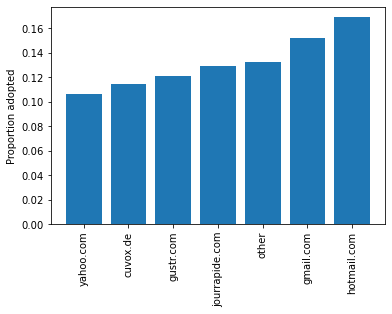

In [36]:
# Visualize differences in adoption by domain.
plt.bar(x=test_email.index, height = test_email.proportion)
plt.xticks(rotation=90)
plt.ylabel('Proportion adopted')
plt.show()